<a href="https://colab.research.google.com/github/eugenefauntleroy/press_freedom_cluster_analysis/blob/main/cluster_analysis_press_freedom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

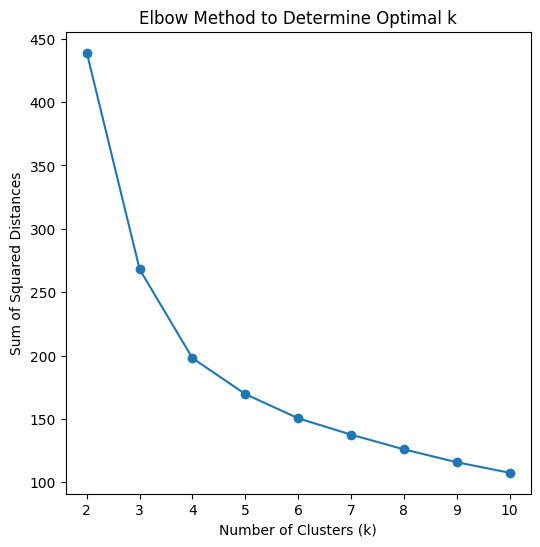

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-22-61b394bf04c3>:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_profiles = rsf_data.groupby('Cluster').mean()


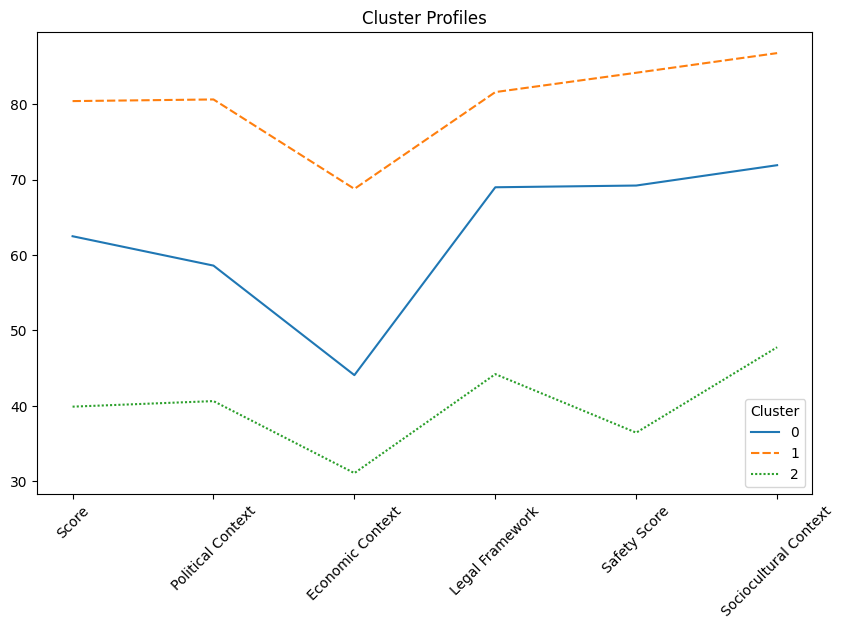

,Ranking,Country,Score,Political Context,Economic Context,Legal Framework,Safety Score,Sociocultural Context,Cluster
0,1,Norway,92.65,94.89,90.38,92.23,92.03,93.71,1
1,2,Denmark,90.27,94.34,83.67,89.18,92.97,91.17,1
2,3,Sweden,88.84,91.96,87.66,90.27,84.14,90.18,1
3,4,Estonia,88.83,91.11,81.97,87.87,93.20,90.00,1
4,5,Finland,88.42,90.40,82.03,86.64,92.26,90.77,1


In [22]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load data—replace with your own path
rsf_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/desktop_data/DATA/RSB_DataSet.csv')

# Selecting the score columns
score_columns = ['Score', 'Political Context', 'Economic Context', 'Legal Framework', 'Safety Score', 'Sociocultural Context']

# Normalizing the data
data_for_clustering = rsf_data[score_columns].copy()
scaler = StandardScaler()
data_for_clustering_scaled = scaler.fit_transform(data_for_clustering)

# Running KMeans with a range of k values to find the best one (using the elbow method)
sse = []  # List to hold the sum of squared distances for each k
k_values = range(2, 11)  # Testing k values from 2 to 10
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_for_clustering_scaled)
    sse.append(kmeans.inertia_)

# Plotting the SSE for each k value
plt.figure(figsize=(6, 6))
plt.plot(k_values, sse, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method to Determine Optimal k')
plt.show()

# In this case, let's choose k = 3
k_optimal = 3
kmeans_optimal = KMeans(n_clusters=k_optimal, random_state=42)
clusters = kmeans_optimal.fit_predict(data_for_clustering_scaled)

# Adding the cluster labels to the original data
rsf_data['Cluster'] = clusters

# Calculating the mean score for each indicator within each cluster
cluster_profiles = rsf_data.groupby('Cluster').mean()

# Transposing the DataFrame for easier plotting
cluster_profiles_transposed = cluster_profiles[score_columns].transpose()

# Creating a line plot of the cluster profiles
plt.figure(figsize=(10, 6))
sns.lineplot(data=cluster_profiles_transposed)
plt.xticks(rotation=45)
plt.title('Cluster Profiles')
plt.show()

# Sort the DataFrame by the 'Score' column in descending order
sorted_data = rsf_data.sort_values('Score', ascending=False)

# Display the top 5 rows
top_countries = sorted_data.head(5)
top_countries


In [41]:
from IPython.display import display

display(cluster_profiles)

# Calculating the mean score for each indicator within each cluster
cluster_profiles = rsf_data.groupby('Cluster').mean()[score_columns]

# Transposing the DataFrame for easier plotting
cluster_profiles = cluster_profiles.transpose()

Cluster,0,1,2
Score,62.487101,80.404419,39.891912
Political Context,58.592464,80.622558,40.628088
Economic Context,44.071594,68.766744,31.081324
Legal Framework,68.979275,81.599070,44.204412
Safety Score,69.208551,84.161628,36.443824
Sociocultural Context,71.905362,86.766977,47.767941


<ipython-input-41-d9fb2cb16295>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_profiles = rsf_data.groupby('Cluster').mean()[score_columns]


In [28]:
"""Cluster 0: This cluster includes countries with moderate press freedom scores (around 62.5). Countries in this cluster have relatively low scores in the 'Economic Context' category (around 44.07), which could suggest that economic factors are a significant challenge to press freedom in these countries."""

"Cluster 0: This cluster includes countries with moderate press freedom scores (around 62.5). Countries in this cluster have relatively low scores in the 'Economic Context' category (around 44.07), which could suggest that economic factors are a significant challenge to press freedom in these countries."

In [30]:
"""Cluster 1: This cluster includes countries with high press freedom scores (around 80.4), such as Denmark, Sweden, Estonia, and Finland. Countries in this cluster have high scores across all indicators, suggesting that press freedom is generally well-protected in these countries."""

'Cluster 1: This cluster includes countries with high press freedom scores (around 80.4), such as Denmark, Sweden, Estonia, and Finland. Countries in this cluster have high scores across all indicators, suggesting that press freedom is generally well-protected in these countries.'

In [33]:
"""Cluster 2: This cluster includes countries with low press freedom scores (around 39.89). Countries in this cluster have particularly low scores in the 'Economic Context' category (around 31.08), suggesting that economic factors are a major impediment to press freedom in these countries."""

"Cluster 2: This cluster includes countries with low press freedom scores (around 39.89). Countries in this cluster have particularly low scores in the 'Economic Context' category (around 31.08), suggesting that economic factors are a major impediment to press freedom in these countries."